In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option("display.max_row",303)
pd.set_option("display.max_columns",14)

In [3]:
dt = pd.read_csv("heart.csv")

In [4]:
dt.shape

(303, 14)

## exploratory Data Analysis

#### objectif :
* comprendre du mieux possible nos données (un petit pas en avant vaut mieux qu'un grand pas en arriére)
* Développer une premier stratégie de modélisation

#### Analyse de forme :
* **variable target** :  target
* **lignes et colonnes** :303, 14
* **types de variables** : int 13 (92.85%) float 1 (7.14%)
* **Analyse des valeurs manquantes**: no NaN 

In [5]:
df = dt.copy()

In [6]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [7]:
df.dtypes.value_counts(normalize=True)*100

int64      92.857143
float64     7.142857
dtype: float64

In [8]:
df.dtypes.value_counts()

int64      13
float64     1
dtype: int64

In [9]:
df.isna().sum()/df.shape[0]

age         0.0
sex         0.0
cp          0.0
trestbps    0.0
chol        0.0
fbs         0.0
restecg     0.0
thalach     0.0
exang       0.0
oldpeak     0.0
slope       0.0
ca          0.0
thal        0.0
target      0.0
dtype: float64

### Analyse de Fond:
* **visualisation de la target** : 1    54.455446%   | 0    45.544554%
* **signification des variables** :
        * les variables continues ne sont pas sdandarisées
        * l'age " " " " " " " 
        * les variables booliane : "sex","fbs",'exang'
* **Relation variables / target** :
        * contu/target : thalach , oldpeak
        * target/age  : 55 -> 71 : 0>1

In [10]:
df["target"].value_counts(normalize=True)*100

1    54.455446
0    45.544554
Name: target, dtype: float64

In [11]:
df.select_dtypes("float").columns

Index(['oldpeak'], dtype='object')

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='oldpeak', ylabel='Density'>

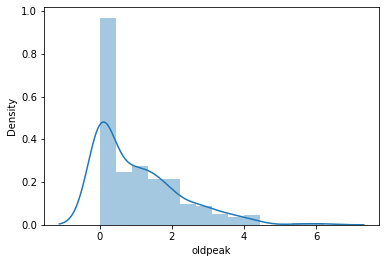

In [12]:
sns.distplot(df['oldpeak'])

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

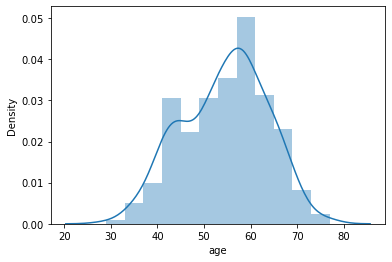

In [13]:
sns.distplot(df["age"])

In [14]:
for col in df.drop(columns=["age"]).select_dtypes('int64'):
    print(f"{col:-<} {df[col].unique()}")

sex [1 0]
cp [3 2 1 0]
trestbps [145 130 120 140 172 150 110 135 160 105 125 142 155 104 138 128 108 134
 122 115 118 100 124  94 112 102 152 101 132 148 178 129 180 136 126 106
 156 170 146 117 200 165 174 192 144 123 154 114 164]
chol [233 250 204 236 354 192 294 263 199 168 239 275 266 211 283 219 340 226
 247 234 243 302 212 175 417 197 198 177 273 213 304 232 269 360 308 245
 208 264 321 325 235 257 216 256 231 141 252 201 222 260 182 303 265 309
 186 203 183 220 209 258 227 261 221 205 240 318 298 564 277 214 248 255
 207 223 288 160 394 315 246 244 270 195 196 254 126 313 262 215 193 271
 268 267 210 295 306 178 242 180 228 149 278 253 342 157 286 229 284 224
 206 167 230 335 276 353 225 330 290 172 305 188 282 185 326 274 164 307
 249 341 407 217 174 281 289 322 299 300 293 184 409 259 200 327 237 218
 319 166 311 169 187 176 241 131]
fbs [1 0]
restecg [0 1 2]
thalach [150 187 172 178 163 148 153 173 162 174 160 139 171 144 158 114 151 161
 179 137 157 123 152 168 140 188 125 1

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level functi

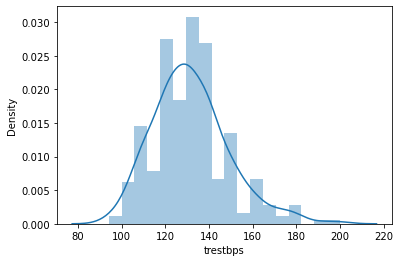

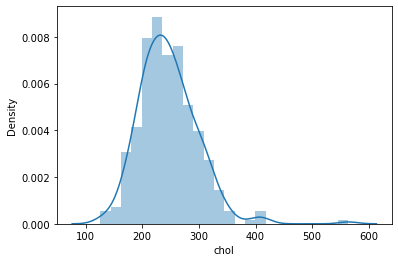

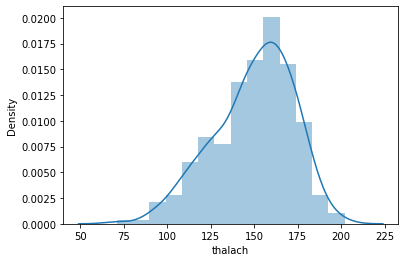

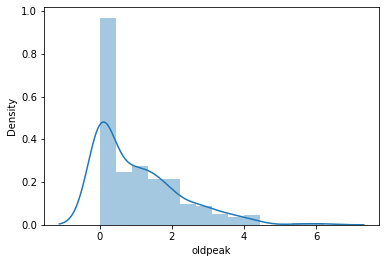

In [15]:
for col in df.drop(columns=['target','sex','age','cp','fbs','restecg','exang','slope',"ca",'thal']):
    plt.figure()
    sns.distplot(df[col])

In [16]:
bol = ["sex","fbs",'exang']

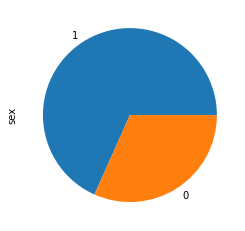

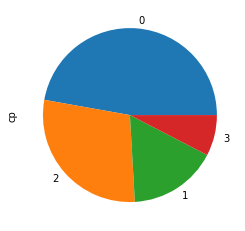

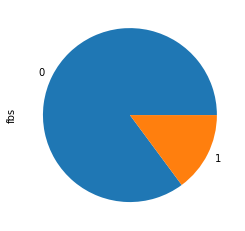

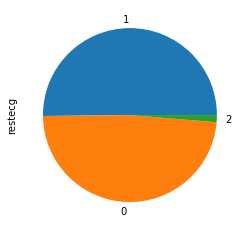

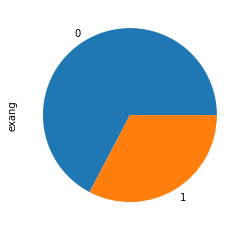

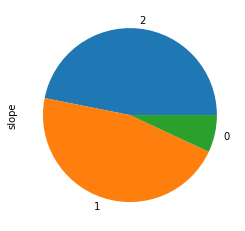

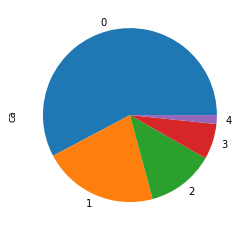

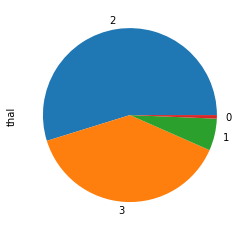

In [17]:
for col in ['sex','cp','fbs','restecg','exang','slope',"ca",'thal']:
    plt.figure()
    df[col].value_counts().plot.pie()

In [18]:
df_1 = df[df["target"] == 1]
df_2 = df[df["target"] == 0]

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level functi

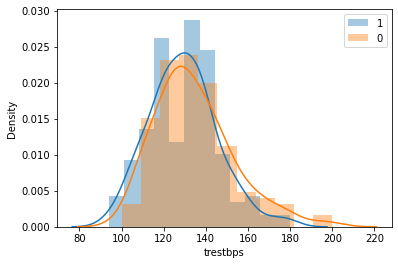

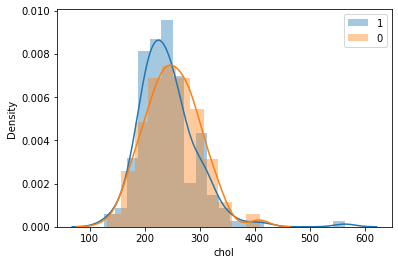

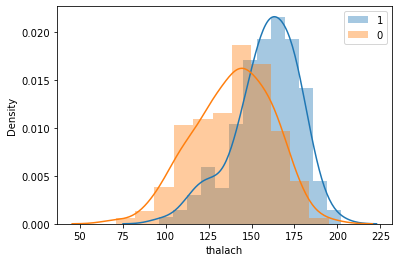

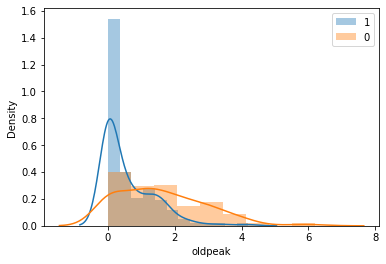

In [19]:
for col in df.drop(columns=["target",'sex','cp','fbs','restecg','exang','slope',"ca",'thal',"age"]).columns:
    plt.figure()
    sns.distplot(df_1[col],label = "1")
    sns.distplot(df_2[col],label = "0")
    plt.legend()

<AxesSubplot:xlabel='age', ylabel='count'>

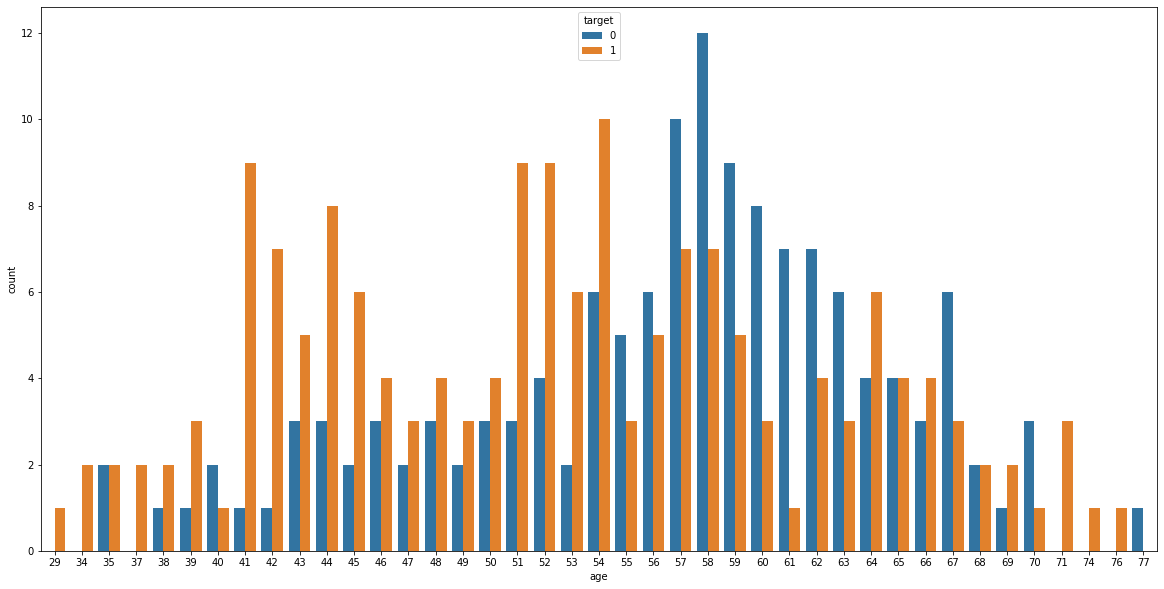

In [20]:
plt.figure(figsize=(20,10))
sns.countplot(x ="age" , hue ="target", data=df)

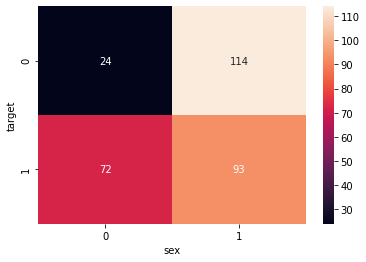

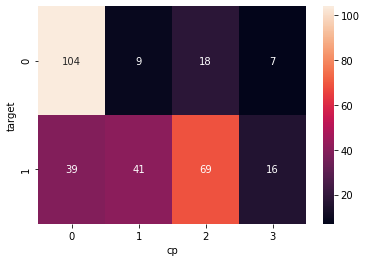

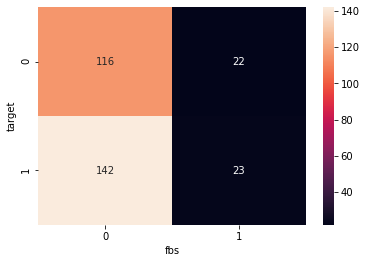

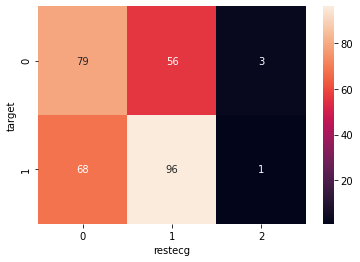

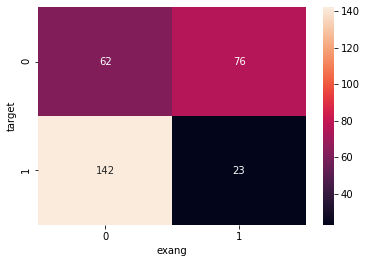

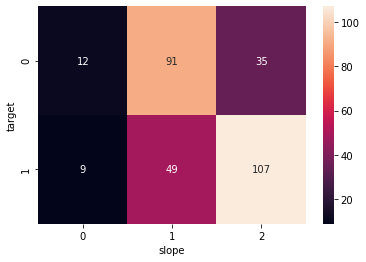

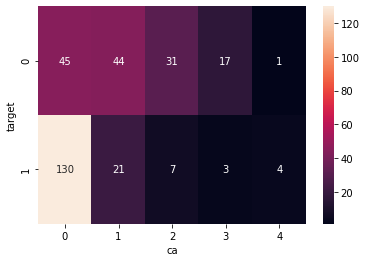

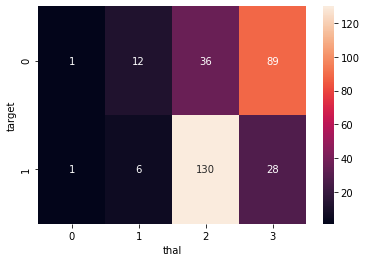

In [21]:
for col in ['sex','cp','fbs','restecg','exang','slope',"ca",'thal']:
    plt.figure()
    sns.heatmap(pd.crosstab(df["target"],df[col]), annot=True,fmt='d')

## Analyse plus détaillée 
* Relation Variables / Variables : il n ya pas bct de corr

<AxesSubplot:>

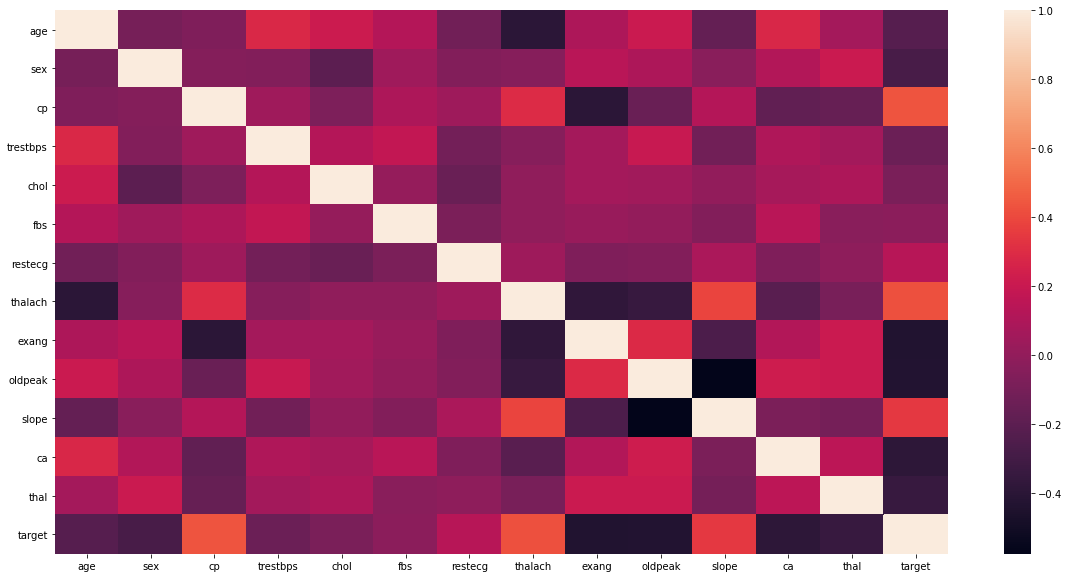

In [22]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr())

In [23]:
df.corr()["age"].sort_values()

thalach    -0.398522
target     -0.225439
slope      -0.168814
restecg    -0.116211
sex        -0.098447
cp         -0.068653
thal        0.068001
exang       0.096801
fbs         0.121308
oldpeak     0.210013
chol        0.213678
ca          0.276326
trestbps    0.279351
age         1.000000
Name: age, dtype: float64

In [24]:
for col in ['sex','cp','fbs','restecg','exang','slope',"ca",'thal']:
    pd.crosstab(dt["target"], df[col])

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [27]:
df.shape[0]

303

In [28]:
trainset , testset = train_test_split(df,test_size=0.2,random_state=0)

In [30]:
trainset['target'].value_counts()

1    131
0    111
Name: target, dtype: int64

In [31]:
testset["target"].value_counts()

1    34
0    27
Name: target, dtype: int64

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, confusion_matrix, classification_report
from sklearn.model_selection import learning_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [40]:
def preprocessing(df):
    x = df.drop('target', axis=1)
    y = df["target"]
    
    print(y.value_counts())
    
    return x,y
def evaluation(model):
    model.fit(x_train,y_train)
    ypred = model.predict(x_test)
    
    print(confusion_matrix(y_test, ypred))
    print(classification_report(y_test, ypred))
    print(model.score(x_test,y_test)) 

In [37]:
lr = LogisticRegression()
knn = KNeighborsClassifier()
sgd =SGDClassifier()
tree = DecisionTreeClassifier()
moduls = {"lr":lr,"knn":knn,"sgd":sgd,"tree":tree}

In [38]:
x_train,y_train = preprocessing(trainset)
x_test , y_test = preprocessing(testset)

1    131
0    111
Name: target, dtype: int64
1    34
0    27
Name: target, dtype: int64


In [41]:
for model in moduls:
    print(model)
    evaluation(moduls[model])

lr
[[22  5]
 [ 4 30]]
              precision    recall  f1-score   support

           0       0.85      0.81      0.83        27
           1       0.86      0.88      0.87        34

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61

0.8524590163934426
knn
[[17 10]
 [12 22]]
              precision    recall  f1-score   support

           0       0.59      0.63      0.61        27
           1       0.69      0.65      0.67        34

    accuracy                           0.64        61
   macro avg       0.64      0.64      0.64        61
weighted avg       0.64      0.64      0.64        61

0.639344262295082
sgd
[[13 14]
 [ 2 32]]
              precision    recall  f1-score   support

           0       0.87      0.48      0.62        27
           1       0.70      0.94      0.80        34

    accuracy                           0.74        61
   macro avg       0.78

C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [42]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

In [43]:
knn = make_pipeline(StandardScaler(),KNeighborsClassifier(3))
sgd = make_pipeline(StandardScaler(),SGDClassifier())
rl = make_pipeline(StandardScaler(),LogisticRegression())
moduls = {"lr":lr,"knn":knn,"sgd":sgd}

In [44]:
from sklearn.model_selection import cross_val_score,StratifiedKFold
from sklearn.model_selection import GridSearchCV

In [45]:
cv=StratifiedKFold(4,shuffle=True)

In [46]:
def evaluation(model):
    model.fit(x_train,y_train)
    ypred = model.predict(x_test)
    
    print(confusion_matrix(y_test, ypred))
    print(classification_report(y_test, ypred))
    print(model.score(x_test,y_test))
    n, train_score, val_score = learning_curve(model, x_train, y_train, cv=cv, train_sizes=np.linspace(0.1,1,10))
    
    
    plt.figure(figsize=(12,8))
    plt.plot(n, train_score.mean(axis=1), label = 'train')
    plt.plot(n, val_score.mean(axis=1), label = 'validation')
    plt.legend()

lr
[[22  5]
 [ 4 30]]
              precision    recall  f1-score   support

           0       0.85      0.81      0.83        27
           1       0.86      0.88      0.87        34

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61

0.8524590163934426


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

knn
[[22  5]
 [ 5 29]]
              precision    recall  f1-score   support

           0       0.81      0.81      0.81        27
           1       0.85      0.85      0.85        34

    accuracy                           0.84        61
   macro avg       0.83      0.83      0.83        61
weighted avg       0.84      0.84      0.84        61

0.8360655737704918
sgd
[[21  6]
 [ 8 26]]
              precision    recall  f1-score   support

           0       0.72      0.78      0.75        27
           1       0.81      0.76      0.79        34

    accuracy                           0.77        61
   macro avg       0.77      0.77      0.77        61
weighted avg       0.77      0.77      0.77        61

0.7704918032786885


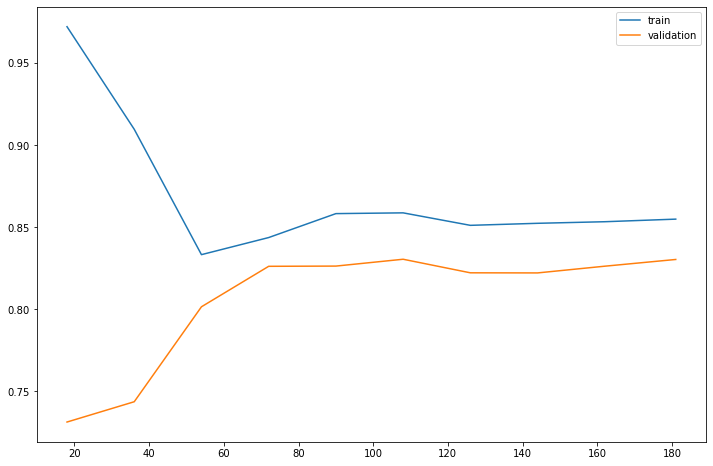

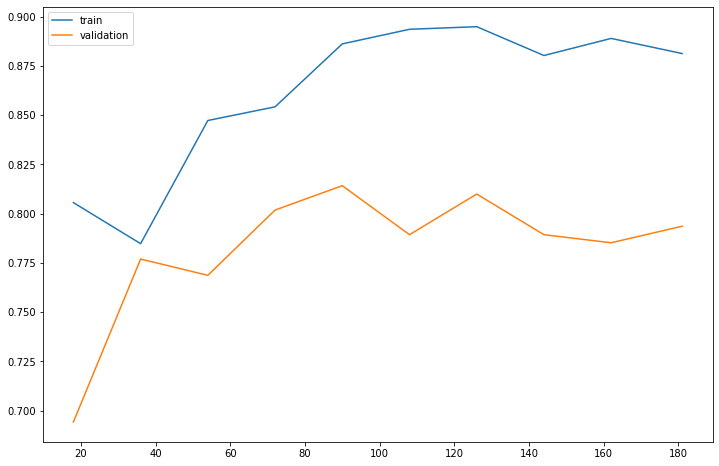

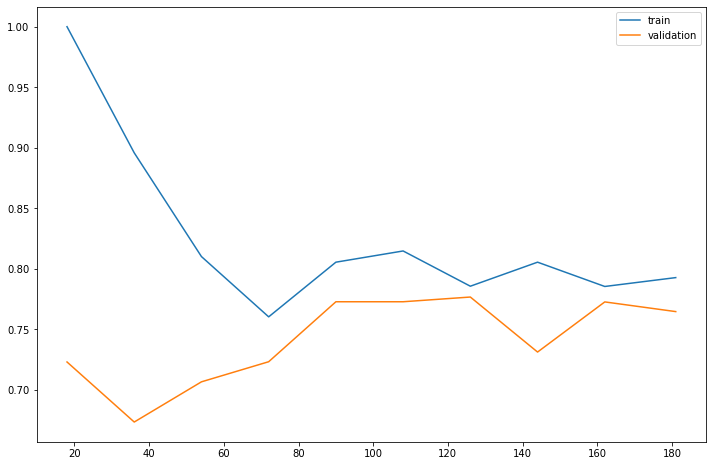

In [47]:
for model in moduls:
    print(model)
    evaluation(moduls[model])

In [48]:
knn

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kneighborsclassifier', KNeighborsClassifier(n_neighbors=3))])

In [64]:
para={"kneighborsclassifier__n_neighbors":np.arange(1,14),
     "kneighborsclassifier__metric":['euclidean','manhattan','chebyshev',"minkowski"]}

In [65]:
grid = GridSearchCV(knn,param_grid=para,cv=cv)
grid.fit(x_train,y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=4, random_state=None, shuffle=True),
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('kneighborsclassifier',
                                        KNeighborsClassifier(n_neighbors=3))]),
             param_grid={'kneighborsclassifier__metric': ['euclidean',
                                                          'manhattan',
                                                          'chebyshev',
                                                          'minkowski'],
                         'kneighborsclassifier__n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13])})

In [66]:
grid.best_score_

0.8346311475409837

In [67]:
grid.best_params_

{'kneighborsclassifier__metric': 'manhattan',
 'kneighborsclassifier__n_neighbors': 9}

In [68]:
knn_1=grid.best_estimator_

[[19  8]
 [ 3 31]]
              precision    recall  f1-score   support

           0       0.86      0.70      0.78        27
           1       0.79      0.91      0.85        34

    accuracy                           0.82        61
   macro avg       0.83      0.81      0.81        61
weighted avg       0.83      0.82      0.82        61

0.819672131147541


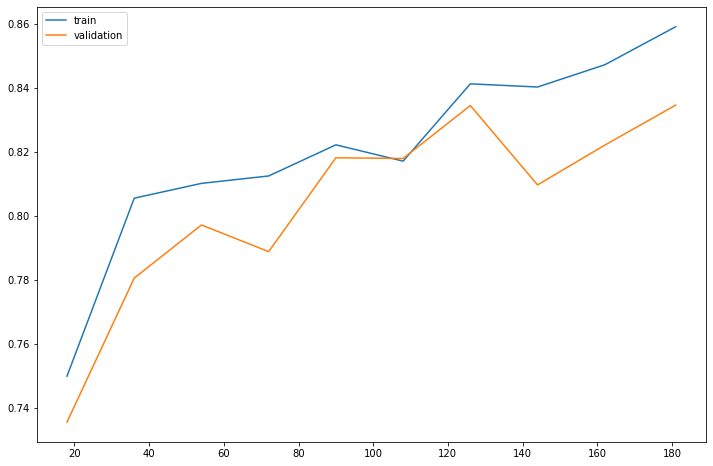

In [69]:
evaluation(knn_1)

C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

[[22  5]
 [ 4 30]]
              precision    recall  f1-score   support

           0       0.85      0.81      0.83        27
           1       0.86      0.88      0.87        34

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61

0.8524590163934426


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

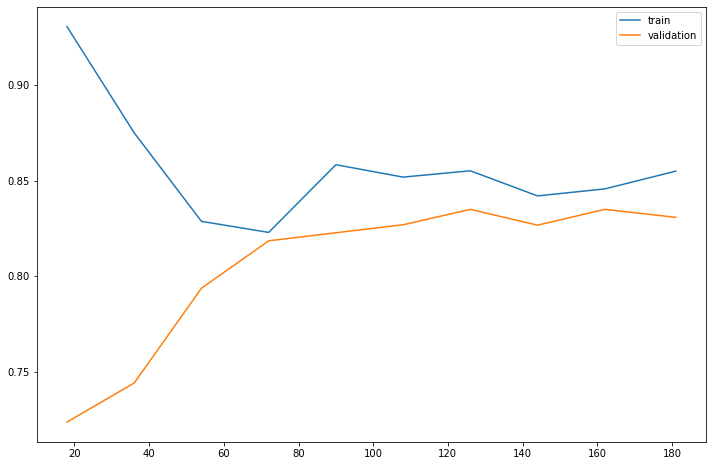

In [76]:
evaluation(lr)

In [ ]:
lr.fit(x_train,y_tr)